In [1]:
import numpy as np
import tensorflow as tf
import PIL
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tqdm import tqdm

In [2]:
cd

/Users/vinayak


In [3]:
cd /Users/vinayak/Desktop/Polygence Project

/Users/vinayak/Desktop/Polygence Project


In [4]:
ls

Polygence Project.ipynb        celebrity_jason segel/
Report.docx                    celebrity_jeniffer aniston/
X.pickle                       celebrity_jim parsons/
X1.pickle                      celebrity_josh radnor/
celebrity kaley cucoo/         celebrity_lisa kundrow/
celebrity_Elliot Gould/        celebrity_madhuri dixit/
celebrity_Genelia Deshmukh/    celebrity_matt lee blanc/
celebrity_Gillian Hall/        celebrity_mayim bailik/
celebrity_Johnny Galeki/       celebrity_neil patrick harris/
celebrity_Kunal Nayyar/        celebrity_simon helberg/
celebrity_bob saget/           training_data/
celebrity_cobie smulders/      y.pickle
celebrity_cortne cox/          y1.pickle
celebrity_david schiwmmer/     ~$Report.docx


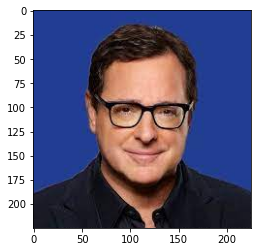

In [5]:
DATADIR = '/Users/vinayak/Desktop/Polygence Project'

CATEGORIES = ["celebrity_bob saget", "celebrity_cobie smulders","celebrity_jason segel","celebrity kaley cucoo","celebrity_jeniffer aniston","celebrity_Elliot Gould","celebrity_jim parsons","celebrity_Genelia Deshmukh" ,"celebrity_josh radnor","celebrity_Gillian Hall" ,"celebrity_lisa kundrow","celebrity_Johnny Galeki","celebrity_madhuri dixit","celebrity_Kunal Nayyar" ,"celebrity_matt lee blanc","celebrity_mayim bailik","celebrity_neil patrick harris","celebrity_cortne cox" ,"celebrity_simon helberg","celebrity_david schiwmmer"]
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img))
        im_rgb=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)# convert to array
        plt.imshow(im_rgb)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [6]:
print (img_array)


[[[148  61  34]
  [148  61  34]
  [148  61  34]
  ...
  [148  61  34]
  [148  61  34]
  [148  61  34]]

 [[148  61  34]
  [148  61  34]
  [148  61  34]
  ...
  [148  61  34]
  [148  61  34]
  [148  61  34]]

 [[148  61  34]
  [148  61  34]
  [148  61  34]
  ...
  [148  61  34]
  [148  61  34]
  [148  61  34]]

 ...

 [[ 36  26  26]
  [ 36  26  26]
  [ 36  26  26]
  ...
  [ 34  24  24]
  [ 34  24  24]
  [ 36  26  26]]

 [[ 36  26  26]
  [ 36  26  26]
  [ 36  26  26]
  ...
  [ 34  24  24]
  [ 34  24  24]
  [ 38  28  28]]

 [[ 36  26  26]
  [ 36  26  26]
  [ 36  26  26]
  ...
  [ 30  20  20]
  [ 37  27  27]
  [ 37  25  25]]]


In [7]:
print (img_array.shape)

(225, 225, 3)


In [8]:
img_label = 0

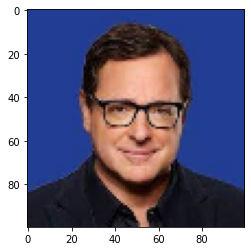

In [9]:
IMG_SIZE = 100

new_array = cv2.resize(im_rgb, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path 
        class_num = CATEGORIES.index(category)  
        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img))
                im_rgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
                print(im_rgb)#convert to array
                new_array = cv2.resize(im_rgb, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    

create_training_data()

print(len(training_data))

  0%|          | 0/6 [00:00<?, ?it/s]

[[[ 34  61 148]
  [ 34  61 148]
  [ 34  61 148]
  ...
  [ 34  61 148]
  [ 34  61 148]
  [ 34  61 148]]

 [[ 34  61 148]
  [ 34  61 148]
  [ 34  61 148]
  ...
  [ 34  61 148]
  [ 34  61 148]
  [ 34  61 148]]

 [[ 34  61 148]
  [ 34  61 148]
  [ 34  61 148]
  ...
  [ 34  61 148]
  [ 34  61 148]
  [ 34  61 148]]

 ...

 [[ 26  26  36]
  [ 26  26  36]
  [ 26  26  36]
  ...
  [ 24  24  34]
  [ 24  24  34]
  [ 26  26  36]]

 [[ 26  26  36]
  [ 26  26  36]
  [ 26  26  36]
  ...
  [ 24  24  34]
  [ 24  24  34]
  [ 28  28  38]]

 [[ 26  26  36]
  [ 26  26  36]
  [ 26  26  36]
  ...
  [ 20  20  30]
  [ 27  27  37]
  [ 25  25  37]]]
[[[144 127 133]
  [128 111 117]
  [128 111 117]
  ...
  [145 125 134]
  [145 126 132]
  [145 126 132]]

 [[144 127 133]
  [130 113 119]
  [130 113 119]
  ...
  [140 120 129]
  [140 121 127]
  [140 121 127]]

 [[146 127 133]
  [136 117 123]
  [135 116 122]
  ...
  [136 116 125]
  [136 117 123]
  [136 117 123]]

 ...

 [[162 123 126]
  [163 127 131]
  [155 125 127]
  ..

100%|██████████| 6/6 [00:00<00:00, 458.90it/s]

[[[4 2 3]
  [4 2 3]
  [3 1 2]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[4 2 3]
  [4 2 3]
  [3 1 2]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[4 2 3]
  [4 2 3]
  [3 1 2]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 0 1]
  [2 0 1]
  [2 0 1]]]
[[[208 194 181]
  [208 194 181]
  [208 194 181]
  ...
  [177 160 144]
  [176 159 143]
  [176 159 143]]

 [[208 194 181]
  [208 194 181]
  [208 194 181]
  ...
  [177 160 144]
  [176 159 143]
  [176 159 143]]

 [[208 194 181]
  [208 194 181]
  [209 195 182]
  ...
  [177 160 144]
  [177 160 144]
  [176 159 143]]

 ...

 [[129 117 117]
  [129 117 117]
  [129 117 117]
  ...
  [179 165 154]
  [179 161 149]
  [180 158 145]]

 [[128 118 117]
  [128 118 117]
  [128 118 117]
  ...
  [164 147 137]
  [174 152 138]
  [180 157 143]]

 [[128 118 117]
  [128 118 117]
  [128 118 117]
  ...
  [166

In [11]:
len(training_data)

101

In [12]:
import random
random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

12
9
3
10
17
6
15
7
17
13


In [14]:
X_test = []
y_test = []
for features,label in training_data[:10]:
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

In [15]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

[[[[ 71 112 114]
   [ 68 109 113]
   [ 66 107 113]
   ...
   [142 175 164]
   [143 176 165]
   [139 172 161]]

  [[ 71 112 114]
   [ 68 109 113]
   [ 66 107 113]
   ...
   [141 174 163]
   [142 175 164]
   [139 172 161]]

  [[ 71 112 114]
   [ 68 109 113]
   [ 66 107 113]
   ...
   [140 173 162]
   [141 174 163]
   [139 172 161]]

  ...

  [[146 173 174]
   [145 178 177]
   [141 180 177]
   ...
   [127 169 165]
   [127 169 165]
   [127 169 165]]

  [[146 174 175]
   [145 178 177]
   [141 180 177]
   ...
   [129 170 166]
   [128 170 166]
   [133 175 171]]

  [[146 173 175]
   [145 178 177]
   [141 180 177]
   ...
   [129 171 167]
   [129 171 167]
   [135 177 173]]]]


In [16]:
len(X)

101

In [17]:
X.shape

(101, 100, 100, 3)

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [18]:
num_classes = 20

model = Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [21]:
model.fit(X,y, epochs=15)

Epoch 1/15
4/4 [==============================] - 1s 73ms/step - loss: 3.1107 - accuracy: 0.0099
Epoch 2/15
4/4 [==============================] - 0s 76ms/step - loss: 2.9558 - accuracy: 0.0990
Epoch 3/15
4/4 [==============================] - 0s 72ms/step - loss: 2.9280 - accuracy: 0.1881
Epoch 4/15
4/4 [==============================] - 0s 73ms/step - loss: 2.8404 - accuracy: 0.1980
Epoch 5/15
4/4 [==============================] - 0s 76ms/step - loss: 2.6988 - accuracy: 0.2277
Epoch 6/15
4/4 [==============================] - 0s 78ms/step - loss: 2.4312 - accuracy: 0.4455
Epoch 7/15
4/4 [==============================] - 0s 78ms/step - loss: 2.1519 - accuracy: 0.4257
Epoch 8/15
4/4 [==============================] - 0s 74ms/step - loss: 1.7004 - accuracy: 0.6139
Epoch 9/15
4/4 [==============================] - 0s 76ms/step - loss: 1.2411 - accuracy: 0.7525
Epoch 10/15
4/4 [==============================] - 0s 76ms/step - loss: 0.9341 - accuracy: 0.7822
Epoch 11/15
4/4 [============

In [22]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 - 0s - loss: 0.0181 - accuracy: 1.0000

Test accuracy: 1.0


In [35]:
path = '/Users/vinayak/Desktop/Polygence Project/training_data'

In [40]:
output_data = [] 
for img in os.listdir(path): 
    try:
        img_array = cv2.imread(os.path.join(path,img))
        im_rgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        print(im_rgb)#convert to array
        new_array = cv2.resize(im_rgb, (IMG_SIZE, IMG_SIZE))
        output_data.append([new_array])  # add this to our training_data
    except Exception as e:  # in the interest in keeping the output clean...
        pass
    
output_data = np.array(output_data).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(len(output_data))

[[[138 142 151]
  [138 142 151]
  [138 142 151]
  ...
  [128 132 141]
  [125 132 142]
  [125 132 142]]

 [[138 142 151]
  [138 142 151]
  [138 142 151]
  ...
  [128 132 141]
  [124 131 141]
  [124 131 141]]

 [[138 142 151]
  [138 142 151]
  [138 142 151]
  ...
  [128 132 141]
  [126 130 141]
  [126 130 141]]

 ...

 [[ 88  95 114]
  [ 88  95 114]
  [ 87  94 113]
  ...
  [ 35  23  23]
  [ 35  24  22]
  [ 34  24  22]]

 [[ 88  95 114]
  [ 88  95 114]
  [ 87  94 113]
  ...
  [ 36  24  24]
  [ 33  23  21]
  [ 33  23  21]]

 [[ 88  95 114]
  [ 88  95 114]
  [ 87  94 113]
  ...
  [ 38  26  26]
  [ 34  24  22]
  [ 34  24  22]]]
[[[112 122 121]
  [113 123 122]
  [114 124 123]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[110 120 119]
  [111 121 120]
  [112 122 121]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[112 123 119]
  [113 124 120]
  [114 125 121]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 ...

 [[226 178  80]
  [225 177  77]
  [223 175  75]
  ..

In [41]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [42]:
predictions = probability_model.predict(output_data)

In [43]:
predictions[0]

array([1.5931057e-05, 1.4468264e-03, 1.2343419e-04, 7.9021394e-01,
       6.1687792e-04, 4.1629551e-03, 4.8333604e-05, 1.8762127e-02,
       9.9740600e-06, 1.6538993e-03, 1.4092816e-01, 4.3727222e-04,
       1.7517322e-04, 4.9849594e-04, 1.4334774e-02, 1.8395027e-02,
       3.5246324e-03, 1.8556441e-04, 2.7153941e-05, 4.4394801e-03],
      dtype=float32)